# Projeto

This project is a demonstration of Pandas library functions.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [38]:
#Foram escolhidos dois datasets relativos a dados de vendas do site Olist, extraídos de https://www.kaggle.com/olistbr/brazilian-ecommerce?select=olist_order_items_dataset.csv
df4 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Geolocation.csv",error_bad_lines=False, low_memory=False)
df9 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Products.csv",error_bad_lines=False, low_memory=False)

In [67]:
df4.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
19902,c9f62bee5c17494edcb5c3f3f56d75ad,beleza_saude,59.0,3561.0,5.0,325.0,28.0,13.0,12.0
1308,cfe99a31516679fb9515881d25891570,fashion_calcados,35.0,222.0,5.0,500.0,29.0,12.0,23.0
3043,bb812a3e630d1d023c592cbc7b3bd7fa,moveis_decoracao,58.0,1972.0,2.0,3000.0,69.0,11.0,11.0
13047,ea012826f2cb04c6fd08522ca179302f,papelaria,58.0,640.0,4.0,500.0,26.0,32.0,26.0
11204,0c22c51625fc11357a8356efa31fe89f,cama_mesa_banho,51.0,747.0,2.0,11400.0,16.0,2.0,11.0


In [69]:
df9.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
18408,286bcf62e47dfc1e51cf0d525bd4d1bf,cama_mesa_banho,52.0,852.0,1.0,4200.0,31.0,43.0,21.0
12432,03706dca83513062fe74967a71b5fc78,NaN,NaN,NaN,NaN,400.0,25.0,8.0,11.0
4210,9190ce23001d7618017faae67788ea09,cama_mesa_banho,41.0,627.0,1.0,4442.0,57.0,36.0,42.0
7814,72348c2ae355b4d8c6680ca93a8e263a,utilidades_domesticas,54.0,419.0,1.0,3200.0,81.0,7.0,60.0
29555,2befa4541c8bf3f4c76ebbed873f628f,eletroportateis,20.0,1839.0,1.0,8100.0,39.0,31.0,33.0


In [47]:
df4.shape

(1000163, 5)

In [70]:
df9.shape

(32951, 9)

In [48]:
df4.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [71]:
df9.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [55]:
#Modificando os nomes das colunas
df4.rename(columns={"geolocation_zip_code_prefix":"CEP", "geolocation_lat": "Latitude", "geolocation_lng": "Longitude", "geolocation_city": "Cidade", "geolocation_state": "Estado"}, inplace=True)

In [73]:
df9.rename(columns={"product_id":"ID", "product_category_name":"Categoria", "product_name_lenght":"CompNome", "product_weight_g":"Peso", "product_length_cm":"Comprimento", "product_height_cm":"Altura", "product_width_cm":"Largura"}, inplace=True)

In [57]:
df4.dtypes

CEP            int64
Latitude     float64
Longitude    float64
Cidade        object
Estado        object
dtype: object

In [82]:
#Removendo Coluna Desnecessária
df9.drop('product_photos_qty',axis=1, inplace=True)

In [83]:
df9.dtypes

ID              object
Categoria       object
CompNome       float64
Peso           float64
Comprimento    float64
Altura         float64
Largura        float64
dtype: object

In [58]:
df4.describe()

,CEP,Latitude,Longitude
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [62]:
df4.groupby("Estado")["Cidade"].nunique()

Estado
AC      34
AL     130
AM      74
AP      17
BA     652
CE     260
DF      28
ES     160
GO     384
MA     299
MG    1426
MS     133
MT     213
PA     219
PB     254
PE     267
PI     278
PR     651
RJ     245
RN     214
RO      83
RR      14
RS     691
SC     420
SE      96
SP    1048
TO     173
Name: Cidade, dtype: int64

In [63]:
df4.isnull().sum()

CEP          0
Latitude     0
Longitude    0
Cidade       0
Estado       0
dtype: int64

In [84]:
df9.isnull().sum()

ID               0
Categoria      610
CompNome       610
Peso             2
Comprimento      2
Altura           2
Largura          2
dtype: int64

In [86]:
df9.dropna(inplace=True)

In [87]:
df9.describe()

,CompNome,Peso,Comprimento,Altura,Largura
count,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
mean,48.476592,2276.956586,30.854545,16.958813,23.208596
std,10.245699,4279.291845,16.955965,13.636115,12.078762
min,5.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,40425.000000,105.000000,105.000000,118.000000


In [88]:
#Criando coluna de volume aproximado
df9["Volume"]= df9["Comprimento"].mul(df9["Altura"]).mul(df9["Largura"])

In [100]:
df9.tail()

,ID,Categoria,CompNome,Peso,Comprimento,Altura,Largura,Volume
14992,07f7c5fe95aa4a3b8ea56a5119546939,beleza_saude,54.0,30000.0,55.0,75.0,61.0,251625.0
1159,f97ad9066c718a6cef93dfcf253d3e0d,moveis_decoracao,63.0,30000.0,61.0,70.0,65.0,277550.0
9739,97194fdae68fa163b7cc5c02bfedbf16,bebes,51.0,30000.0,81.0,50.0,50.0,202500.0
12146,f227e2d44f10f7dad30fb4dfa839e7a2,moveis_sala,51.0,30000.0,70.0,60.0,70.0,294000.0
25166,26644690fde745fc4654719c3904e1db,cama_mesa_banho,59.0,40425.0,13.0,65.0,28.0,23660.0


In [97]:
df9.sort_values("Peso", ascending=True, inplace=True)

Text(0, 0.5, 'Volume')

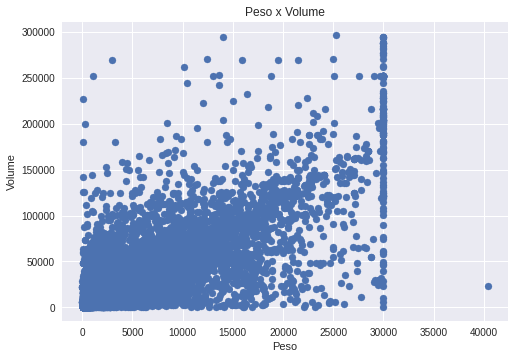

In [99]:
#Gráfico de volume por peso do produto:

plt.scatter(x=df9["Peso"], y = df9["Volume"]);
plt.title("Peso x Volume")
plt.xlabel("Peso")
plt.ylabel("Volume")


Há uma clara correlação positiva entre peso e volume. No entanto, a correlação é mais fraca do que se poderia imaginar.

In [101]:
#Identificando o Outlier
df9[df9["Peso"] == 40425]

,ID,Categoria,CompNome,Peso,Comprimento,Altura,Largura,Volume
25166,26644690fde745fc4654719c3904e1db,cama_mesa_banho,59.0,40425.0,13.0,65.0,28.0,23660.0


In [115]:
df4

,CEP,Latitude,Longitude,Cidade,Estado
992584,98780,-36.605374,-64.283946,santa rosa,RS
993302,98780,-36.603837,-64.287433,santa rosa,RS
993075,98780,-36.603837,-64.287433,santa rosa,RS
695375,45936,-34.622400,-58.901888,itabata,BA
513643,28155,-34.586422,-58.732101,santa maria,RJ
...,...,...,...,...,...
860562,83252,42.184003,-8.723762,ilha dos valadares,PR
770534,68447,42.428884,-6.873344,vila dos cabanos,PA
513754,28155,42.439286,13.820214,santa maria,RJ
516682,28595,43.684961,-7.411080,portela,RJ


Text(0.5, 0, 'Longitude')

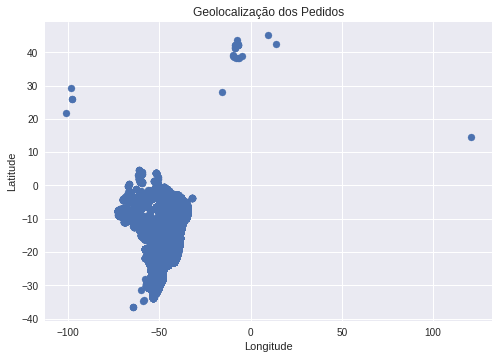

In [104]:
#Gráfico de Latitude por Longitude das compras feitas
plt.scatter(y=df4["Latitude"], x = df4["Longitude"]);
plt.title("Geolocalização dos Pedidos")
plt.ylabel("Latitude")
plt.xlabel("Longitude")

In [105]:
df4.sort_values("Latitude", ascending=True, inplace=True)

In [116]:
#Eliminando os Outliers
df4mod = df4[df4['Latitude'] > 10 ].index
df4.drop(df4mod , inplace=True)

Text(0.5, 0, 'Longitude')

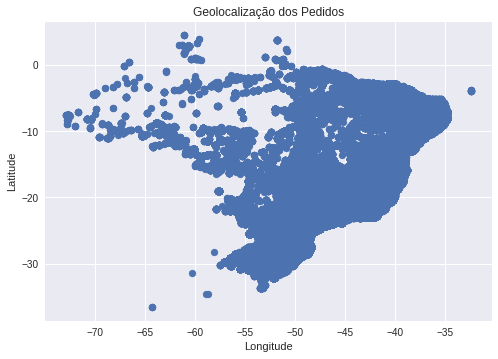

In [117]:
plt.scatter(y=df4["Latitude"], x = df4["Longitude"]);
plt.title("Geolocalização dos Pedidos")
plt.ylabel("Latitude")
plt.xlabel("Longitude")